In [6]:
from community_knapsack import *
from evaluation import evaluation
import random

In [7]:
# The algorithms to use for this evaluation:
exact_algorithms = [
    PBMultiAlgorithm.MEMOIZATION,
    PBMultiAlgorithm.DYNAMIC_PROGRAMMING,
    PBMultiAlgorithm.ILP_SOLVER
]

approximation_algorithms = [
    PBMultiAlgorithm.GREEDY,
    PBMultiAlgorithm.RATIO_GREEDY,
    PBMultiAlgorithm.BRANCH_AND_BOUND,
    PBMultiAlgorithm.SIMULATED_ANNEALING,
    PBMultiAlgorithm.GENETIC_ALGORITHM
]

In [8]:
# The boundaries of this evaluation:

# We test between one and ten dimensions where each budget is randomly generated
# between 10 and 1000 and the cost of each project in a dimension must be within
# 5-50% of the budget in that dimension.

random.seed(181)

num_projects = 50
num_voters = 3000

start_dimensions = 1
end_dimensions = 10
step_dimensions = 1

budget = [random.randint(10_000, 1_000_000) for _ in range(end_dimensions//step_dimensions)]
cost_bounds = [
    (int(b * 0.05), int(b * 0.4))
    for bid, b in enumerate(budget)
]

In [9]:
x_axis = list(range(start_dimensions, end_dimensions + 1, step_dimensions))

In [10]:
problems = evaluation.generate_multi_problems(
    num_project_bounds=[(num_projects, num_projects)],
    num_voters_bounds=[(num_voters, num_voters)],
    dimension_bounds=x_axis,
    budget_bounds=[[[(b, b) for b in budget[:d]]] for d in x_axis],
    cost_bounds=[[[cost_bound for cost_bound in cost_bounds[:d]]] for d in x_axis]
)

In [12]:
# Obtain the exact results for this evaluation:
exact_results = evaluation.solve_problems(
    problem_list=problems,
    algorithms=exact_algorithms,
    timeout=60,
    max_fail=1,
    file_name='ext-random-dimensions-big-budget.json',
    output=True
)

Processing MEMOIZATION:
0
1
2
3
4
5
6
7
8
9
Processing DYNAMIC_PROGRAMMING:
0


Process Process-11:
Traceback (most recent call last):
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/finbj/Documents/repos/community-knapsack/community_knapsack/pbproblem.py", line 255, in _worker
    allocation, value = algorithm(self.budget, self.costs, values)
  File "/Users/finbj/Documents/repos/community-knapsack/community_knapsack/pbalgorithm.py", line 107, in __call__
    return self.value[0](*args, **kwargs)
  File "/Users/finbj/Documents/repos/community-knapsack/community_knapsack/solvers/exact/dyn_prog.py", line 201, in multi_dynamic_programming
    memo[sub_problem] = ([], 0)
KeyboardInterrupt


KeyboardInterrupt: 

In [13]:
# Obtain the exact results for this evaluation:
approximation_results = evaluation.solve_problems(
    problem_list=problems,
    algorithms=approximation_algorithms,
    timeout=60,
    max_fail=1,
    file_name='apx-random-dimensions-big-budget.json',
    output=True
)

Processing GREEDY:
0
1
2
3
4
5
6
7
8
9
Processing RATIO_GREEDY:
0
1
2
3
4
5
6
7
8
9
Processing BRANCH_AND_BOUND:
0
1
2
3
4
5
6
7
8
9
Processing SIMULATED_ANNEALING:
0
1
2
3
4
5
6
7
8
9
Processing GENETIC_ALGORITHM:
0


Exception ignored in: <module 'collections.abc' from '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/collections/abc.py'>
Traceback (most recent call last):
  File "<string>", line 1, in <module>
KeyboardInterrupt: 
<frozen importlib._bootstrap>:228: RuntimeWarning: Cython module failed to patch module with custom type


KeyboardInterrupt: 

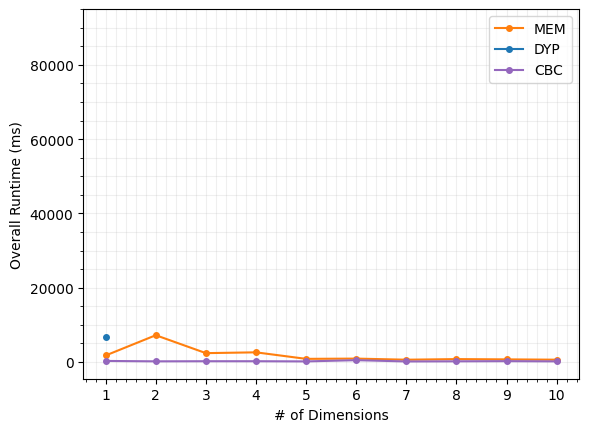

In [73]:
# Plot the exact algorithm runtimes over the problems:
evaluation.plot_2d(
    x_axis=x_axis,
    y_axes=evaluation.get_y_axes(exact_results, exact_algorithms, 2),
    x_label='# of Dimensions',
    y_label='Overall Runtime (ms)',
    labels=evaluation.get_labels(exact_algorithms),
    colors=evaluation.get_colors(exact_algorithms),
    alphas=evaluation.get_alphas(exact_algorithms),
    sizes=evaluation.get_sizes(exact_algorithms),
    x_ticks=x_axis,
    x_tick_minor=False,
    fix_y=(-4500, 95000)
)

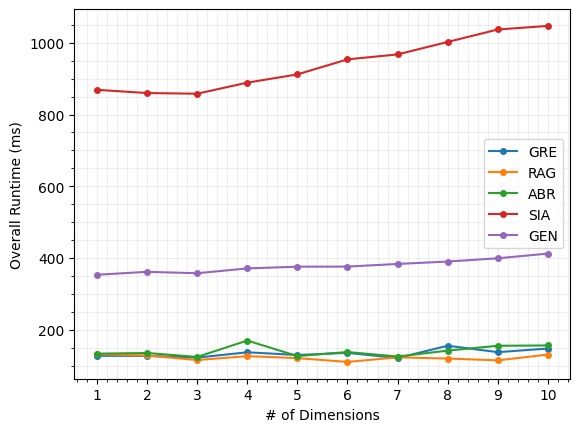

In [74]:
# Plot the exact algorithm runtimes over the problems:
evaluation.plot_2d(
    x_axis=x_axis,
    y_axes=evaluation.get_y_axes(approximation_results, approximation_algorithms, 2),
    x_label='# of Dimensions',
    y_label='Overall Runtime (ms)',
    labels=evaluation.get_labels(approximation_algorithms),
    colors=evaluation.get_colors(approximation_algorithms),
    alphas=evaluation.get_alphas(approximation_algorithms),
    sizes=evaluation.get_sizes(approximation_algorithms),
    x_ticks=x_axis,
    x_tick_minor=False
)

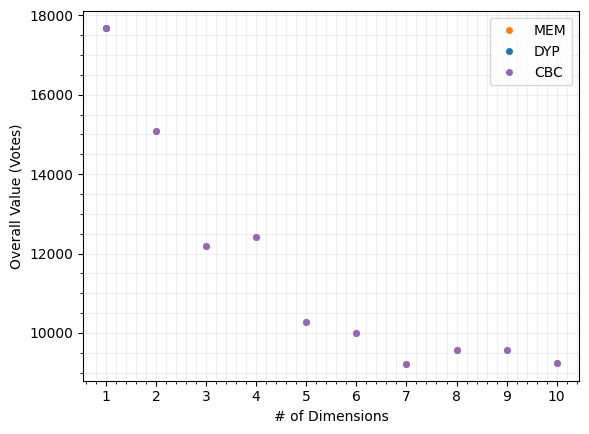

In [75]:
# Plot the approximation vs. exact algorithm values over the problems:
evaluation.plot_2d(
    x_axis=x_axis,
    y_axes=evaluation.get_y_axes(exact_results, exact_algorithms, 0),
    x_label='# of Dimensions',
    y_label='Overall Value (Votes)',
    marker='o',
    labels=evaluation.get_labels(exact_algorithms),
    colors=evaluation.get_colors(exact_algorithms),
    alphas=evaluation.get_alphas(exact_algorithms),
    sizes=evaluation.get_sizes(exact_algorithms),
    x_ticks=x_axis,
    x_tick_minor=False,
)

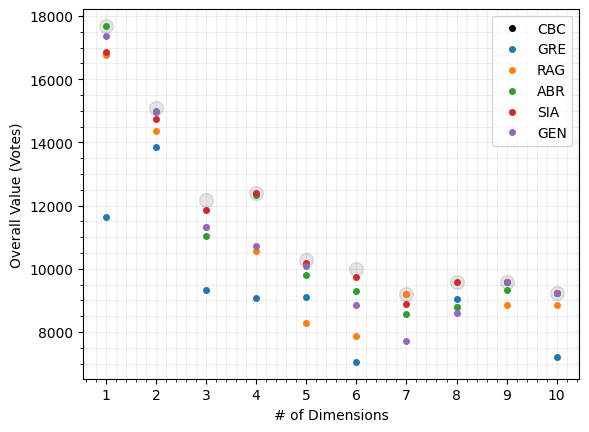

In [76]:
# Plot the approximation vs. exact algorithm values over the problems:
evaluation.plot_2d(
    x_axis=x_axis,
    y_axes=[evaluation.get_y_axis(exact_results, PBSingleAlgorithm.ILP_SOLVER, 0)] + evaluation.get_y_axes(approximation_results, approximation_algorithms, 0),
    x_label='# of Dimensions',
    y_label='Overall Value (Votes)',
    marker='o',
    labels=['CBC'] + evaluation.get_labels(approximation_algorithms),
    colors=['black'] + evaluation.get_colors(approximation_algorithms),
    alphas=[0.1] + evaluation.get_alphas(approximation_algorithms),
    sizes=[10] + evaluation.get_sizes(approximation_algorithms),
    x_ticks=x_axis,
    x_tick_minor=False,
)